In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [13]:
df_path = Path('..') / 'data' / 'Advertising.csv'
df = pd.read_csv(df_path)

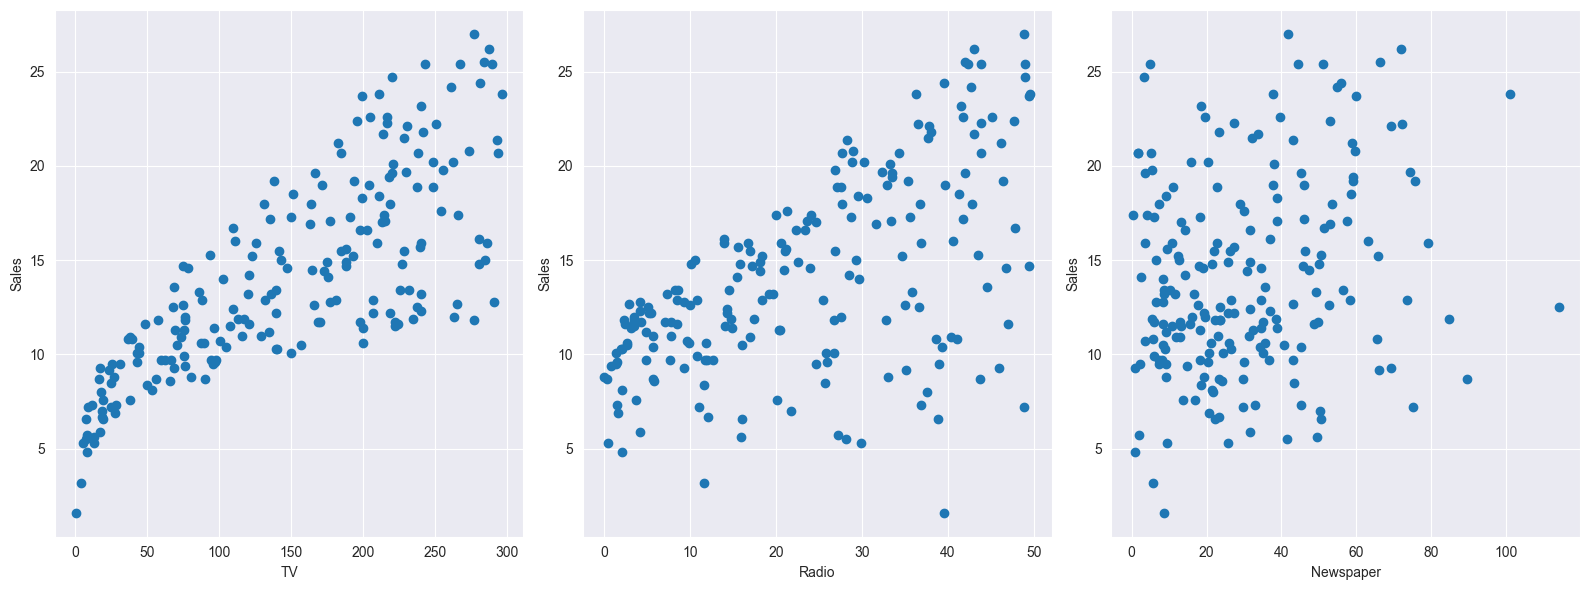

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('Radio')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('Newspaper')
plt.tight_layout()

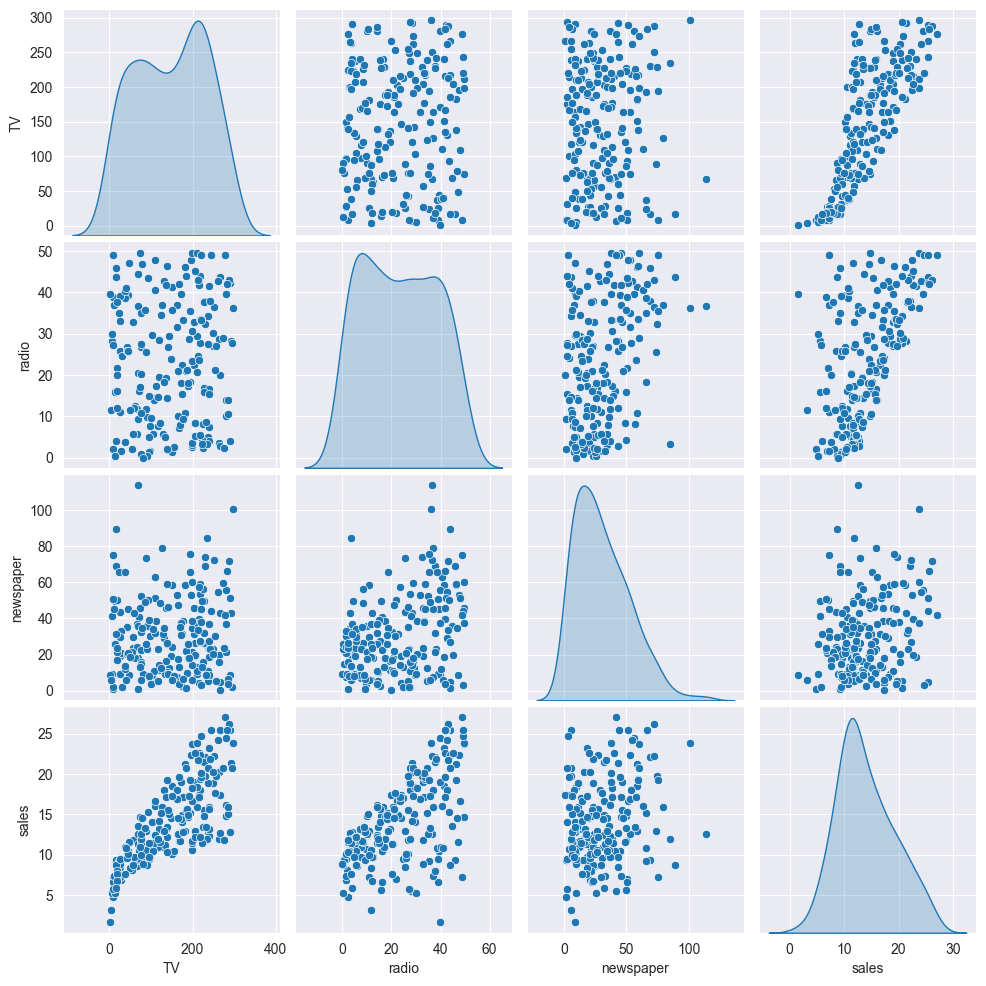

In [16]:
sns.pairplot(df, diag_kind='kde')

In [17]:
X = df.drop('sales', axis=1)
y = df['sales']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [34]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
test_predictions = model.predict(X_test)

In [29]:
len(test_predictions)
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [37]:
MAE

1.213745773614481

In [38]:
MSE

2.2987166978863782

In [39]:
RMSE

1.516151937599388

In [40]:
df['sales']

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [41]:
quarter_path = Path('..') / 'DATA' / 'anscombes_quartet1.csv'
quarter = pd.read_csv(quarter_path)

In [42]:
quarter

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


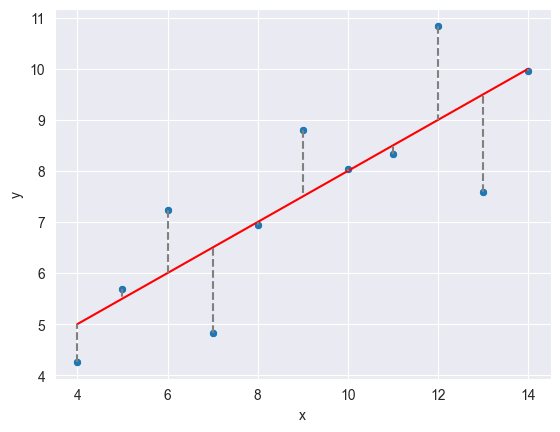

In [48]:
quarter['y_pred'] = 3 + 0.5 * quarter['x']
quarter['residual'] = quarter['y'] - quarter['y_pred']

sns.scatterplot(data=quarter, x='x', y='y')
sns.lineplot(data=quarter, x='x', y='y_pred', color='red')
plt.vlines(quarter['x'], quarter['y'], quarter['y_pred'], color='gray', linestyle='--')

<Axes: xlabel='residual', ylabel='Density'>

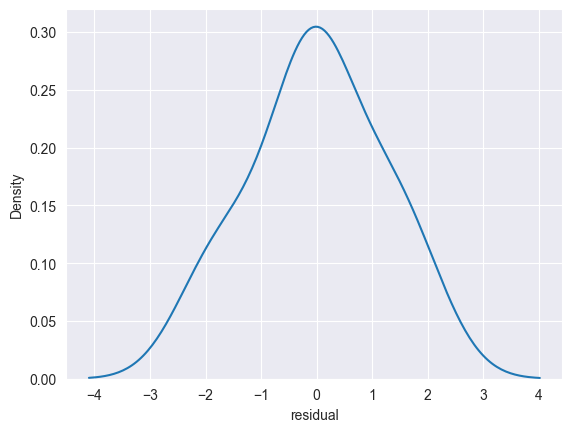

In [49]:
sns.kdeplot(quarter['residual'])

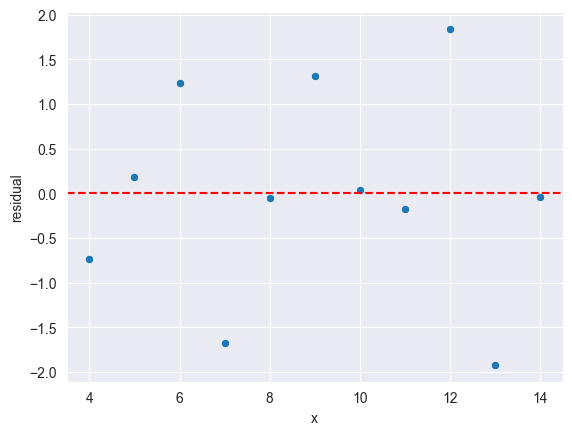

In [52]:
sns.scatterplot(data=quarter, x='x', y='residual')
plt.axhline(0, color='red', linestyle='--')

In [53]:
quarter_path = Path('..') / 'DATA' / 'anscombes_quartet2.csv'
quarter = pd.read_csv(quarter_path)

In [55]:
quarter

,x,y
0,10.0,9.14
1,8.0,8.14
2,13.0,8.74
3,9.0,8.77
4,11.0,9.26
5,14.0,8.10
6,6.0,6.13
7,4.0,3.10
8,12.0,9.13
9,7.0,7.26


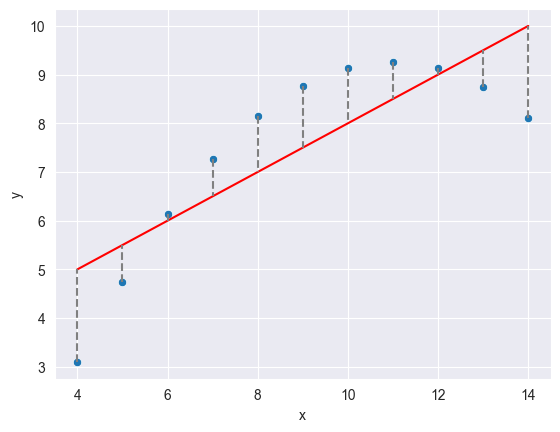

In [60]:
quarter['pred_y'] = 3 + 0.5 * quarter['x']
quarter['residual'] = quarter['y'] - quarter['pred_y']

sns.scatterplot(data=quarter, x='x', y='y')
sns.lineplot(data=quarter, x='x', y='pred_y', color='red')
plt.vlines(quarter['x'], quarter['y'], quarter['pred_y'], color='gray', linestyle='--')

<Axes: xlabel='residual', ylabel='Density'>

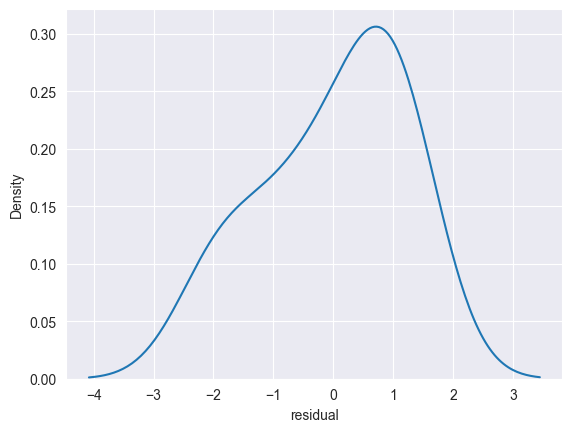

In [61]:
sns.kdeplot(quarter['residual'])

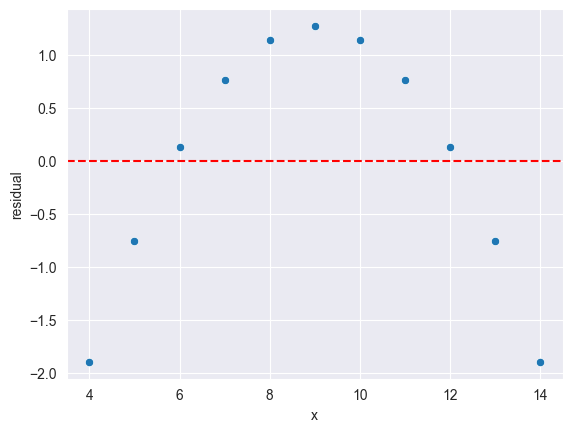

In [62]:
sns.scatterplot(data=quarter, x='x', y='residual')
plt.axhline(0, color='red', linestyle='--')

In [64]:
quarter_path = Path('..') / 'DATA' / 'anscombes_quartet4.csv'
quarter = pd.read_csv(quarter_path)

In [65]:
quarter

,x,y
0,8.0,6.58
1,8.0,5.76
2,8.0,7.71
3,8.0,8.84
4,8.0,8.47
5,8.0,7.04
6,8.0,5.25
7,19.0,12.50
8,8.0,5.56
9,8.0,7.91


In [66]:
quarter['pred_y'] = 3 + 0.5 * quarter['x']

In [67]:
quarter['residual'] = quarter['y'] - quarter['pred_y']

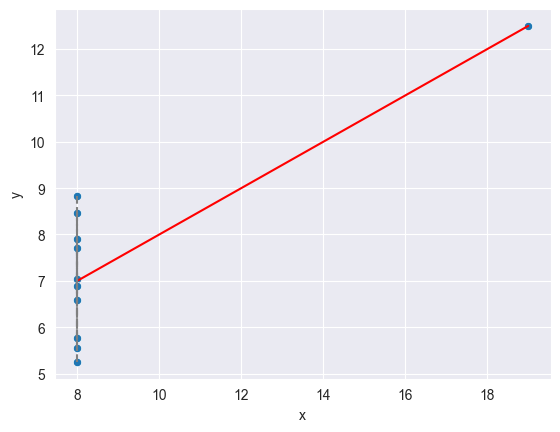

In [68]:
sns.scatterplot(data=quarter, x='x', y='y')
sns.lineplot(data=quarter, x='x', y='pred_y', color='red')
plt.vlines(quarter['x'], quarter['y'], quarter['pred_y'], color='gray', linestyle='--')

<Axes: xlabel='residual', ylabel='Density'>

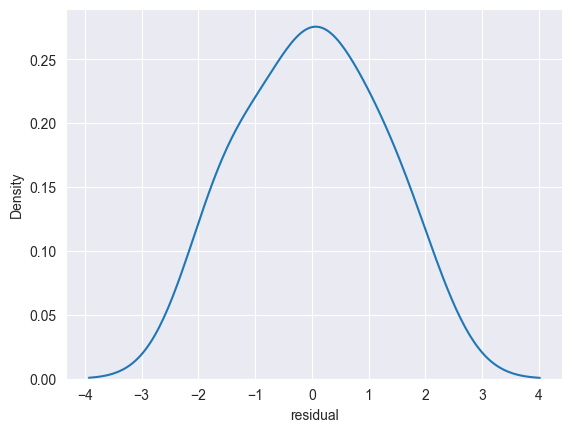

In [69]:
sns.kdeplot(quarter['residual'])

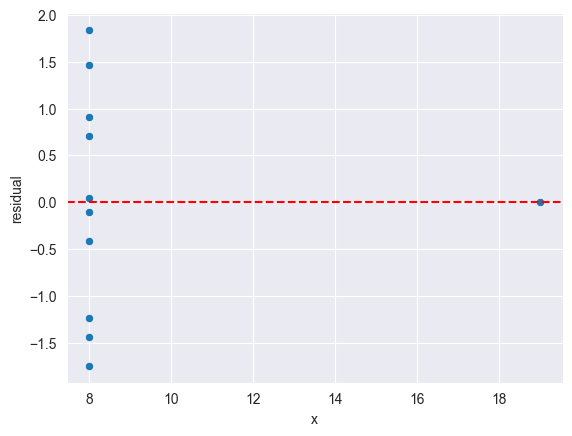

In [70]:
sns.scatterplot(data=quarter, x='x', y='residual')
plt.axhline(0, color='red', linestyle='--')